In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [ ]:
data=pd.read_csv("Advertising.csv")
print(data.isna().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [ ]:
x=data.loc[:,"Radio"].values
y=data.loc[:,"Newspaper"].values

In [ ]:
print(x[:5])

[37.8 39.3 45.9 41.3 10.8]


In [ ]:
print(y[:5])

[69.2 45.1 69.3 58.5 58.4]


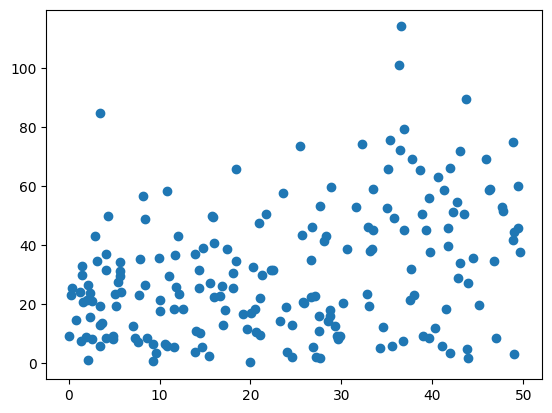

In [ ]:
plt.scatter(x,y)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=2)
dtr.fit(x.reshape(-1,1),y.reshape(-1,1))

DecisionTreeRegressor(max_depth=2)

In [ ]:
y_pred=dtr.predict(np.sort(x.reshape(-1,1)))

In [ ]:
print(y_pred[:5])

[40.31020408 40.31020408 40.31020408 40.31020408 24.49126984]


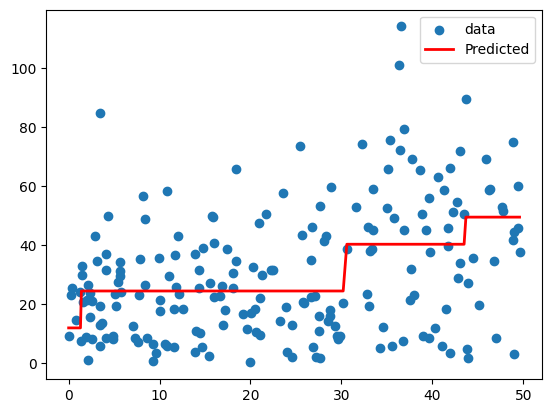

In [ ]:
plt.scatter(x,y,label='data')
plt.plot(np.sort(x),np.sort(y_pred),label="Predicted",linewidth=2,color='red')
plt.legend()
# plt.savefig('hello.png')

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(dtr,out_file='tree.dot',feature_names=['TV'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.metrics import mean_absolute_error as r2

data=range(1,20)
train_error=[]
for i in data:
  le=DecisionTreeRegressor(max_depth=i)
  le.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))
  train_error.append(r2(y_train.reshape(-1,1),le.predict(x_train.reshape(-1,1))))

test_error=[]
for i in data:
  le=DecisionTreeRegressor(max_depth=i)
  le.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))
  test_error.append(r2(y_test.reshape(-1,1),le.predict(y_test.reshape(-1,1))))


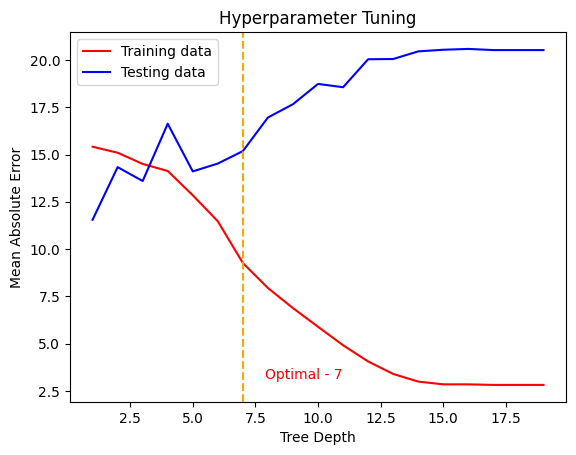

In [ ]:
plt.plot(data,train_error,color="red",label="Training data")
plt.plot(data,test_error,color="blue",label="Testing data")
plt.axvline(x=7,color="orange",linestyle="--")
plt.annotate("Optimal - 7",xy=(7.9,3.15),color="red")
plt.xlabel('Tree Depth')
plt.ylabel('Mean Absolute Error')
plt.title('Hyperparameter Tuning')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
model=DecisionTreeRegressor()

abc=GridSearchCV(model,param_grid={'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                 cv=5,n_jobs=1,scoring='neg_mean_squared_error')

abc.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

print(abc.best_params_)
print(-abc.best_score_)

{'max_depth': 1, 'min_samples_split': 10}
410.2834127047383


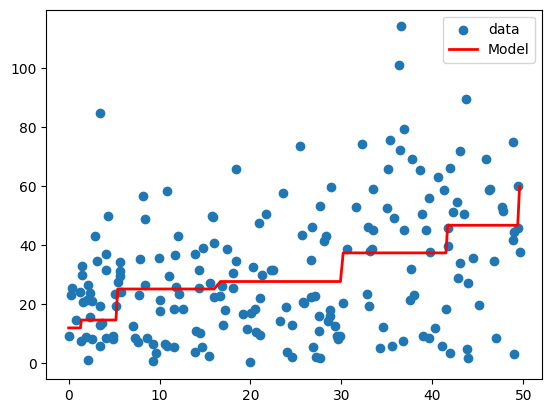

In [ ]:
plt.scatter(x,y,label='data')
new_m=DecisionTreeRegressor(max_depth=9,min_samples_split=50)
new_m.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))
plt.plot(np.sort(x),np.sort(new_m.predict(np.sort(x.reshape(-1,1)))),label="Model",linewidth=2,color='red')
plt.legend()